In [1]:
import pickle

import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
with open('..\\data\\raw\\all_indicators.pickle', 'rb') as f:
        all_indicators = pickle.load(f)

In [3]:
all_indicators.head()

,sumRealEstate,sumRealEstateResidual,sumValuableProperty,sumValuablePropertyResidual,sumBalanceNoFinancial,cash,accountsCash,depositCash,others,debentures,...,firstPlanYearFz44Sum2,firstPlanYearFz223Sum2,firstPlanYearTotalSum2,secondPlanYearFz44Sum2,secondPlanYearFz223Sum2,secondPlanYearTotalSum2,temporary_resources_list_0,temporary_resources_list_1,temporary_resources_list_2,temporary_resources_list_3
0,535953823.5,3.232591e+08,8.028743e+07,40060695.01,735633189.5,1.103241e+08,1.103241e+08,0,0,0,...,48000000.94,54985817.69,1.02986e+08,18884108.50,6.917543e+07,8.80595e+07,6336406.23,NaN,NaN,NaN
1,535953823.5,3.152482e+08,1.150041e+08,59557771.95,745037688.2,7.224127e+07,7.224127e+07,0,14110,0,...,50253702.93,84048742.11,1.34302e+08,49453702.93,1.013222e+08,1.50776e+08,6351920.58,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9299133.6,2.438677e+05,0.000000e+00,0.00,0.0,1.120000e+04,1.120000e+04,0,0,0,...,0.00,0.00,0,0.00,0.000000e+00,0,0.00,NaN,NaN,NaN


In [4]:
all_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sumRealEstate                1539 non-null   float64
 1   sumRealEstateResidual        1539 non-null   float64
 2   sumValuableProperty          1539 non-null   float64
 3   sumValuablePropertyResidual  1539 non-null   float64
 4   sumBalanceNoFinancial        1539 non-null   float64
 5   cash                         1539 non-null   float64
 6   accountsCash                 1539 non-null   float64
 7   depositCash                  1539 non-null   object 
 8   others                       1539 non-null   object 
 9   debentures                   1539 non-null   object 
 10  kredit                       1539 non-null   float64
 11  sumDelayedPayable            1539 non-null   object 
 12  inn                          2275 non-null   object 
 13  year              

# 1. Обработка NaN

In [5]:
all_indicators.dropna(axis=1, how='all', inplace=True)
all_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sumRealEstate                1539 non-null   float64
 1   sumRealEstateResidual        1539 non-null   float64
 2   sumValuableProperty          1539 non-null   float64
 3   sumValuablePropertyResidual  1539 non-null   float64
 4   sumBalanceNoFinancial        1539 non-null   float64
 5   cash                         1539 non-null   float64
 6   accountsCash                 1539 non-null   float64
 7   depositCash                  1539 non-null   object 
 8   others                       1539 non-null   object 
 9   debentures                   1539 non-null   object 
 10  kredit                       1539 non-null   float64
 11  sumDelayedPayable            1539 non-null   object 
 12  inn                          2275 non-null   object 
 13  year              

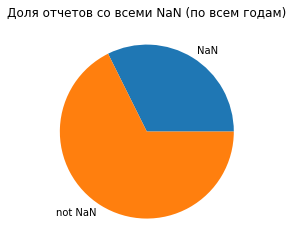

In [6]:
obligatory_columns = list(set(all_indicators.columns) - set(['inn', 'last_update', 'year', 'uniq']))

nan_rows_name = all_indicators \
                .index[all_indicators[obligatory_columns] \
                .isna() \
                .all(axis=1)]

isnan = len(nan_rows_name)
notnan = len(all_indicators) - isnan

naninfo = pd.Series({'NaN': isnan, 'not NaN':notnan}) 

# Make the plot with pandas
naninfo.plot(kind='pie', subplots=True)
plt.title("Доля отчетов со всеми NaN (по всем годам)")
plt.ylabel("")
plt.show()

In [7]:
nanmap = []
for i in all_indicators.index:
    if i in nan_rows_name:
        nanmap.append(False)
    else:
        nanmap.append(True)

all_indicators['nanmap'] = nanmap

In [8]:
obligatory_notnan_data = all_indicators[all_indicators['nanmap'] == True]

obligatory_notnan_data.reset_index(inplace=True)
obligatory_notnan_data.drop(['index', 'nanmap'], axis=1, inplace=True)

obligatory_notnan_data.head()

,sumRealEstate,sumRealEstateResidual,sumValuableProperty,sumValuablePropertyResidual,sumBalanceNoFinancial,cash,accountsCash,depositCash,others,debentures,...,nextYearFz44Sum2,nextYearFz223Sum2,nextYearTotalSum2,firstPlanYearFz44Sum2,firstPlanYearFz223Sum2,firstPlanYearTotalSum2,secondPlanYearFz44Sum2,secondPlanYearFz223Sum2,secondPlanYearTotalSum2,temporary_resources_list_0
0,5.359538e+08,3.232591e+08,8.028743e+07,40060695.01,735633189.5,1.103241e+08,1.103241e+08,0,0,0,...,61549920.23,82999519.74,1.44549e+08,48000000.94,54985817.69,1.02986e+08,18884108.50,6.917543e+07,8.80595e+07,6336406.23
1,5.359538e+08,3.152482e+08,1.150041e+08,59557771.95,745037688.2,7.224127e+07,7.224127e+07,0,14110,0,...,83111912.05,62572921.50,1.45685e+08,50253702.93,84048742.11,1.34302e+08,49453702.93,1.013222e+08,1.50776e+08,6351920.58
2,9.299134e+06,2.438677e+05,0.000000e+00,0.00,0.0,1.120000e+04,1.120000e+04,0,0,0,...,0.00,0.00,0,0.00,0.00,0,0.00,0.000000e+00,0,0.00
3,9.299134e+06,2.321170e+05,0.000000e+00,0.00,0.0,2.190000e+03,2.190000e+03,0,0,0,...,0.00,0.00,0,0.00,0.00,0,0.00,0.000000e+00,0,0.00
4,2.040995e+07,9.670123e+06,3.250253e+07,2972957.73,121089184.5,1.765448e+07,1.765448e+07,0,0,0,...,0.00,11086027.70,1.1086e+07,0.00,0.00,0,0.00,0.000000e+00,0,1427310.80


In [9]:
obligatory_notnan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sumRealEstate                1539 non-null   float64
 1   sumRealEstateResidual        1539 non-null   float64
 2   sumValuableProperty          1539 non-null   float64
 3   sumValuablePropertyResidual  1539 non-null   float64
 4   sumBalanceNoFinancial        1539 non-null   float64
 5   cash                         1539 non-null   float64
 6   accountsCash                 1539 non-null   float64
 7   depositCash                  1539 non-null   object 
 8   others                       1539 non-null   object 
 9   debentures                   1539 non-null   object 
 10  kredit                       1539 non-null   float64
 11  sumDelayedPayable            1539 non-null   object 
 12  inn                          1539 non-null   object 
 13  year              

In [10]:
obligatory_columns = list(set(obligatory_notnan_data.columns) - set(['inn', 'last_update', 'year', 'uniq']))

In [11]:
obligatory_notnan_data.fillna(0, inplace=True)

In [12]:
obligatory_notnan_data.head()

,sumRealEstate,sumRealEstateResidual,sumValuableProperty,sumValuablePropertyResidual,sumBalanceNoFinancial,cash,accountsCash,depositCash,others,debentures,...,nextYearFz44Sum2,nextYearFz223Sum2,nextYearTotalSum2,firstPlanYearFz44Sum2,firstPlanYearFz223Sum2,firstPlanYearTotalSum2,secondPlanYearFz44Sum2,secondPlanYearFz223Sum2,secondPlanYearTotalSum2,temporary_resources_list_0
0,5.359538e+08,3.232591e+08,8.028743e+07,40060695.01,735633189.5,1.103241e+08,1.103241e+08,0.0,0.0,0.0,...,61549920.23,82999519.74,1.445494e+08,48000000.94,54985817.69,1.029858e+08,18884108.50,6.917543e+07,8.805953e+07,6336406.23
1,5.359538e+08,3.152482e+08,1.150041e+08,59557771.95,745037688.2,7.224127e+07,7.224127e+07,0.0,14110.0,0.0,...,83111912.05,62572921.50,1.456848e+08,50253702.93,84048742.11,1.343024e+08,49453702.93,1.013222e+08,1.507759e+08,6351920.58
2,9.299134e+06,2.438677e+05,0.000000e+00,0.00,0.0,1.120000e+04,1.120000e+04,0.0,0.0,0.0,...,0.00,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00
3,9.299134e+06,2.321170e+05,0.000000e+00,0.00,0.0,2.190000e+03,2.190000e+03,0.0,0.0,0.0,...,0.00,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00
4,2.040995e+07,9.670123e+06,3.250253e+07,2972957.73,121089184.5,1.765448e+07,1.765448e+07,0.0,0.0,0.0,...,0.00,11086027.70,1.108603e+07,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1427310.80


# 6. Удалим строки с одними нулями

In [13]:
zero_map = []
for i in range(len(obligatory_notnan_data)):
    row_sum = 0
    for j in obligatory_columns:
        row_sum += obligatory_notnan_data.loc[i, j]
    if row_sum==0:
        zero_map.append(False)
    else:
        zero_map.append(True)
obligatory_notnan_data['zero_map'] = zero_map

print('Число строк с одними нулями = ', len(obligatory_notnan_data)-sum(obligatory_notnan_data['zero_map']))

Число строк с одними нулями =  6


In [14]:
obligatory_notnan_notzero_data = obligatory_notnan_data[obligatory_notnan_data['zero_map'] == True]

obligatory_notnan_notzero_data.reset_index(inplace=True)
obligatory_notnan_notzero_data.drop(['index', 'zero_map'], axis=1, inplace=True)

obligatory_notnan_notzero_data.head()

,sumRealEstate,sumRealEstateResidual,sumValuableProperty,sumValuablePropertyResidual,sumBalanceNoFinancial,cash,accountsCash,depositCash,others,debentures,...,nextYearFz44Sum2,nextYearFz223Sum2,nextYearTotalSum2,firstPlanYearFz44Sum2,firstPlanYearFz223Sum2,firstPlanYearTotalSum2,secondPlanYearFz44Sum2,secondPlanYearFz223Sum2,secondPlanYearTotalSum2,temporary_resources_list_0
0,5.359538e+08,3.232591e+08,8.028743e+07,40060695.01,735633189.5,1.103241e+08,1.103241e+08,0.0,0.0,0.0,...,61549920.23,82999519.74,1.445494e+08,48000000.94,54985817.69,1.029858e+08,18884108.50,6.917543e+07,8.805953e+07,6336406.23
1,5.359538e+08,3.152482e+08,1.150041e+08,59557771.95,745037688.2,7.224127e+07,7.224127e+07,0.0,14110.0,0.0,...,83111912.05,62572921.50,1.456848e+08,50253702.93,84048742.11,1.343024e+08,49453702.93,1.013222e+08,1.507759e+08,6351920.58
2,9.299134e+06,2.438677e+05,0.000000e+00,0.00,0.0,1.120000e+04,1.120000e+04,0.0,0.0,0.0,...,0.00,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00
3,9.299134e+06,2.321170e+05,0.000000e+00,0.00,0.0,2.190000e+03,2.190000e+03,0.0,0.0,0.0,...,0.00,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00
4,2.040995e+07,9.670123e+06,3.250253e+07,2972957.73,121089184.5,1.765448e+07,1.765448e+07,0.0,0.0,0.0,...,0.00,11086027.70,1.108603e+07,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1427310.80


In [15]:
obligatory_notnan_notzero_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sumRealEstate                1533 non-null   float64
 1   sumRealEstateResidual        1533 non-null   float64
 2   sumValuableProperty          1533 non-null   float64
 3   sumValuablePropertyResidual  1533 non-null   float64
 4   sumBalanceNoFinancial        1533 non-null   float64
 5   cash                         1533 non-null   float64
 6   accountsCash                 1533 non-null   float64
 7   depositCash                  1533 non-null   float64
 8   others                       1533 non-null   float64
 9   debentures                   1533 non-null   float64
 10  kredit                       1533 non-null   float64
 11  sumDelayedPayable            1533 non-null   float64
 12  inn                          1533 non-null   object 
 13  year              

In [16]:
obligatory_notnan_notzero_data.groupby(['year']).count()['sumRealEstate'].to_dict()

{'2018': 783, '2019': 736, '2020': 7, '2021': 5, '2022': 2}

In [17]:
obligatory_notnan_notzero_data = obligatory_notnan_data

# Удалим столбцы с одними нулями

In [18]:
limit = 0.6
zero_columns = []
for col_name in obligatory_notnan_notzero_data.columns:
    temp_df = obligatory_notnan_notzero_data==0
    if sum(temp_df[col_name])/len(obligatory_notnan_notzero_data)>=limit:
        zero_columns.append(col_name)

In [19]:
zero_columns

['depositCash',
 'others',
 'debentures',
 'sumDelayedPayable',
 'firstPlanYearFz44Sum1',
 'firstPlanYearFz223Sum1',
 'firstPlanYearTotalSum1',
 'secondPlanYearFz44Sum1',
 'secondPlanYearFz223Sum1',
 'secondPlanYearTotalSum1']

In [20]:
obligatory_columns = list(set(obligatory_columns) - set(zero_columns))
obligatory_columns

['secondPlanYearTotalSum2',
 'firstPlanYearFz44Sum2',
 'cash',
 'nextYearFz44Sum1',
 'nextYearFz223Sum0',
 'nextYearTotalSum0',
 'firstPlanYearFz223Sum0',
 'secondPlanYearFz44Sum0',
 'nextYearFz223Sum1',
 'firstPlanYearTotalSum0',
 'nextYearFz44Sum2',
 'firstPlanYearFz223Sum2',
 'secondPlanYearFz223Sum0',
 'kredit',
 'sumValuableProperty',
 'secondPlanYearFz44Sum2',
 'sumRealEstate',
 'nextYearFz223Sum2',
 'accountsCash',
 'plan_payment_indexes_main_0',
 'nextYearTotalSum1',
 'temporary_resources_list_0',
 'nextYearTotalSum2',
 'nextYearFz44Sum0',
 'secondPlanYearTotalSum0',
 'firstPlanYearFz44Sum0',
 'plan_payment_indexes_0',
 'sumRealEstateResidual',
 'firstPlanYearTotalSum2',
 'sumValuablePropertyResidual',
 'sumBalanceNoFinancial',
 'secondPlanYearFz223Sum2']

# 7. Устранение неявного дублирования в данных
Для некоторых вузов одному финансовому году соответствует несколько строк с финансовыми показателям. Для части вузов можно определить самую свежую строку с показателями по дате последнего обновления. Для некоторых вузов дата последнего обновления у дублирующих строк одна и та же, времени обновления нет. 
Поэтому если можно определить самую свежую строку - оставляем ее. Если все записи с одной датой обновления, то удаляем их все.

In [21]:
def clean_dataset(year, obligatory_columns):
    dataset = obligatory_notnan_notzero_data[obligatory_notnan_notzero_data['year']==year] \
                .reset_index() \
                .drop(['index', 'year'], axis=1)
    print('всего записей =', len(dataset))
    #dataset.head()
    print('количество ВУЗов, для которых за один год несколько записей =', \
          sum(dataset.groupby(['inn']).count()['sumRealEstate']>1))

    # если для вуза больше одной записи за год, удалим их все
    double_inn = dataset.groupby(['inn']).count()['sumRealEstate']>1
    df_double = pd.DataFrame()
    df_double['inn'] = double_inn.index
    df_double['have_double'] = double_inn.values
    double_inn = df_double[df_double['have_double']==True]['inn']
    for i in double_inn:
        indexNames = dataset[dataset['inn']==i].index
        temp_list = []
        for kk in indexNames:
            temp_list.append(dataset.loc[kk]['last_update'])
        # проверим, состоит ли лист из одинаковых элементов
        if len(temp_list)*[temp_list[0]]==temp_list: # если одна дата обновления у всех записей, удаляем их все (например, 7303002000)
            dataset.drop(indexNames, inplace=True) 
        else: # иначе осталяем запись с самой свежей датой обновления (7722000820)
            recent_date = pd.to_datetime(temp_list).max()
            good_last_udate = recent_date.strftime('%d.%m.%Y')
            ddf = dataset[dataset['inn']==i]
            more_index_names = ddf[ddf['last_update']!=good_last_udate].index
            dataset.drop(more_index_names, inplace=True)
    
    print('После удаления записей этих вузов осталось ', len(dataset))
    X = dataset[obligatory_columns]
    
    return (X, dataset['inn'])

In [22]:
(X_2018, inn_2018) = clean_dataset('2018', obligatory_columns)
with open('..\\data\\interim\\X_2018.pickle', 'wb') as f:
    pickle.dump(X_2018, f)
with open('..\\data\\interim\\inn_2018.pickle', 'wb') as f:
    pickle.dump(inn_2018, f)

всего записей = 787
количество ВУЗов, для которых за один год несколько записей = 140
После удаления записей этих вузов осталось  405


In [23]:
(X_2019, inn_2019) = clean_dataset('2019', obligatory_columns)
with open('..\\data\\interim\\X_2019.pickle', 'wb') as f:
    pickle.dump(X_2019, f)
with open('..\\data\\interim\\inn_2019.pickle', 'wb') as f:
    pickle.dump(inn_2019, f)

всего записей = 738
количество ВУЗов, для которых за один год несколько записей = 133
После удаления записей этих вузов осталось  411


In [24]:
(X_2020, inn_2020) = clean_dataset('2020', obligatory_columns)
with open('..\\data\\interim\\X_2020.pickle', 'wb') as f:
    pickle.dump(X_2020, f)
with open('..\\data\\interim\\inn_2020.pickle', 'wb') as f:
    pickle.dump(inn_2020, f)

всего записей = 7
количество ВУЗов, для которых за один год несколько записей = 2
После удаления записей этих вузов осталось  3


In [25]:
(X_2021, inn_2021) = clean_dataset('2021', obligatory_columns)
with open('..\\data\\interim\\X_2021.pickle', 'wb') as f:
    pickle.dump(X_2021, f)
with open('..\\data\\interim\\inn_2021.pickle', 'wb') as f:
    pickle.dump(inn_2021, f)

всего записей = 5
количество ВУЗов, для которых за один год несколько записей = 0
После удаления записей этих вузов осталось  5


In [26]:
(X_2022, inn_2022) = clean_dataset('2022', obligatory_columns)
with open('..\\data\\interim\\X_2022.pickle', 'wb') as f:
    pickle.dump(X_2022, f)
with open('..\\data\\interim\\inn_2022.pickle', 'wb') as f:
    pickle.dump(inn_2022, f)

всего записей = 2
количество ВУЗов, для которых за один год несколько записей = 0
После удаления записей этих вузов осталось  2


In [27]:
len(X_2018) + len(X_2019) + len(X_2020) + len(X_2021) + len(X_2022)

826